In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt 
methods = ["SafeBound", "Postgres"]

buildTimeResults = pd.DataFrame()
rootFileDirectory = "/mnt/ExtraDrive1/SafeBound/Data/Results/" # Change this to your directory path!
for method in methods:
    resultFile = rootFileDirectory + method + "_Build_Results.csv"
    resultData = pd.read_csv(resultFile)
    resultData["Method"] = method
    resultData["Size"] /= 1000000
    buildTimeResults = pd.concat([buildTimeResults, resultData], ignore_index=True)

In [3]:
buildTimeResults = buildTimeResults[((buildTimeResults["Method"].isin(["Postgres"]))&
                                     (buildTimeResults["Run"]==2))|
                                    ((buildTimeResults["Method"].isin(["SafeBound"]))&
                                     (buildTimeResults["Run"]==4))]

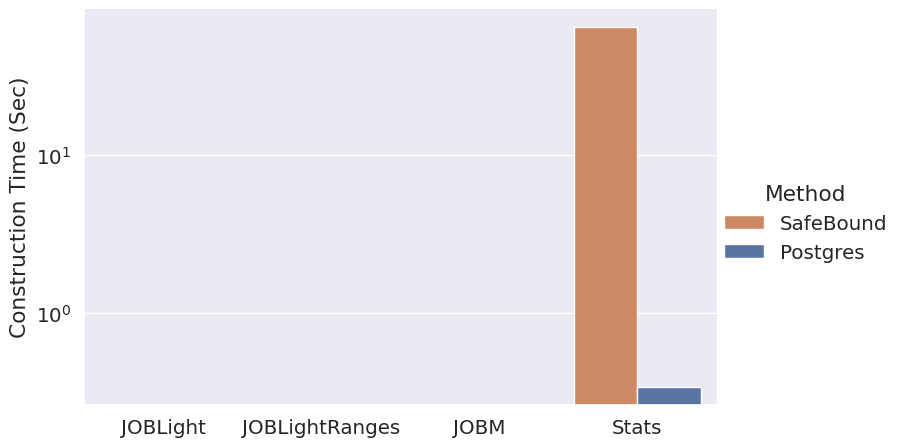

In [4]:
palette = ["C1", "C0", "C2", "C4", "C6"]
hueOrder = ["SafeBound", "Postgres"]
sn.set_style("whitegrid")
sn.set_color_codes("pastel")
sn.set(font_scale = 1.3)
runtimePlot = sn.catplot(y="BuildTime", x="Benchmark", hue="Method", height=5, aspect=6/4, data= buildTimeResults, order=["JOBLight", "JOBLightRanges", "JOBM", "Stats"],palette=palette, hue_order=hueOrder, kind='bar')
runtimePlot.set(ylabel="Construction Time (Sec)", xlabel='')
plt.yscale("log")

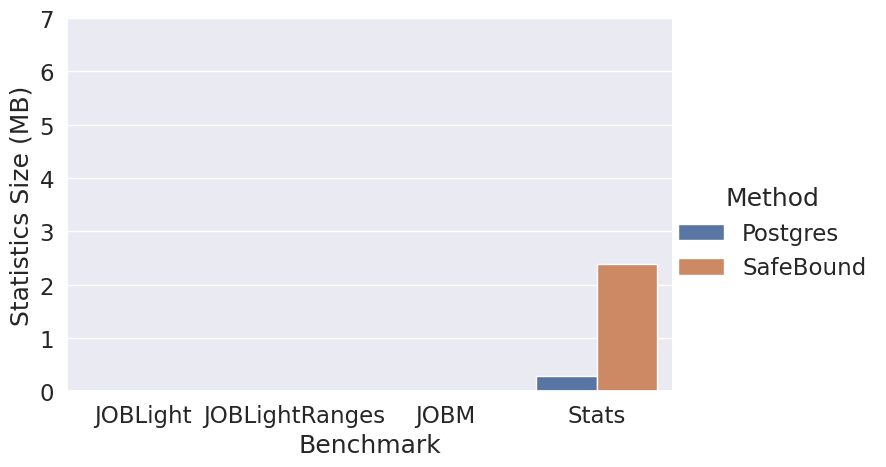

In [7]:
palette = ["C0", "C1", "C2", "C4", "C6"]
hueOrder = ["Postgres", "SafeBound"]
sn.set(rc={'figure.figsize':(14,6)})
sn.set_style("whitegrid")
sn.set_color_codes("pastel")
sn.set(font_scale = 1.5)
runtimePlot = sn.catplot(y="Size", x="Benchmark", hue="Method", height=5, aspect=6/4, data= buildTimeResults, order=["JOBLight", "JOBLightRanges", "JOBM", "Stats"],palette=palette, hue_order=hueOrder, kind='bar')
runtimePlot.set(ylabel="Statistics Size (MB)", xlabel='Benchmark', ylim=[0,7])
plt.yscale("linear")